In [1]:
!pip install roboflow ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.3/760.3 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="uFXIeXtRhpD4REMbT090")
project = rf.workspace("persontrain").project("person-and-fire-detection")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to person-and-fire-detection-9 in yolov8:: 100%|██████████| 9156/9156 [00:01<00:00, 7902.12it/s]


In [4]:
%%writefile /kaggle/working/person-and-fire-detection-9/data.yaml
names:
- fire
- person
nc: 2
roboflow:
  license: CC BY 4.0
  project: person-and-fire-detection
  url: https://universe.roboflow.com/persontrain/person-and-fire-detection/dataset/9
  version: 9
  workspace: persontrain
test: /kaggle/working/person-and-fire-detection-9/test
train: /kaggle/working/person-and-fire-detection-9/train
val: /kaggle/working/person-and-fire-detection-9/valid


Overwriting /kaggle/working/person-and-fire-detection-9/data.yaml


In [5]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/person-and-fire-detection-9/data.yaml epochs=30 imgsz=640 plots=True device=0,1

Ultralytics YOLOv8.2.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/person-and-fire-detection-9/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

In [8]:
import cv2
import matplotlib.pyplot as plt

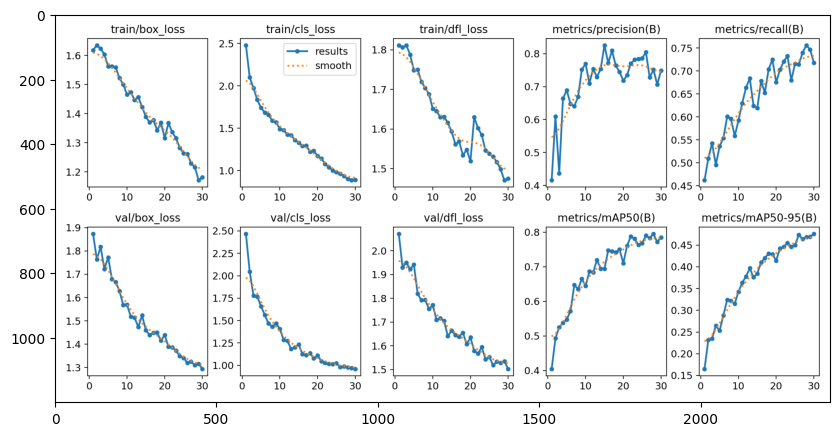

In [9]:
results = cv2.imread('/kaggle/working/runs/detect/train2/results.png')
results = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10)) 
plt.imshow(results)

In [10]:
import os
images_to_test = os.listdir('/kaggle/working/person-and-fire-detection-9/test/images')[:20]
images_to_test

['sit-down-person-images_19_jpg.rf.bd6d85f62a53f7608a744960e546de17.jpg',
 'bonfire_15_jpg.rf.e63d5790025ea0e4657701538fa0358b.jpg',
 'bonfire-images_34_jpg.rf.2ab727fa6d18a29e17c0b650372570e1.jpg',
 'bonfire_39_jpg.rf.d4156f031c31b62556673e0135c30811.jpg',
 'person-low-angle-shot_24_jpg.rf.efa3a313a3fb94ccb2ef2de737f68075.jpg',
 'bonfire_24_jpg.rf.f4f569ac5fc798f21e486b94689d1e7c.jpg',
 'small-fire-burnning_18_jpg.rf.4e94f175fc8d79a804ddf84ea1a3be8b.jpg',
 'small-fire-burnning_7_jpg.rf.cd363884be17dc72c635f52de5f10540.jpg',
 'bonfire_18_jpg.rf.41672de343a29781f69182e264ab083b.jpg',
 'bonfire_15_jpg.rf.f2ec4ead3ac110138bd298fda7cf28dd.jpg',
 'small-fire-burnning_30_jpg.rf.4007571fc6bbad49300562a02070e72f.jpg',
 'lay-down-person-images_43_jpg.rf.a7f8f0793480fb52267776fdd0b6b000.jpg',
 'bonfire-images_19_jpg.rf.ed83a7a5dd6863ebba98d6fca6c11752.jpg',
 'person-images_14_jpg.rf.8116ab12f9fac0498e95c3d71ecd3d5d.jpg',
 'sit-down-person-images_26_jpg.rf.a292aeb7285bb133bf4533cfc3d45dd1.jpg',
 

In [11]:
images = [f'/kaggle/working/person-and-fire-detection-9/test/images/{img}' for img in images_to_test]
images

['/kaggle/working/person-and-fire-detection-9/test/images/sit-down-person-images_19_jpg.rf.bd6d85f62a53f7608a744960e546de17.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/bonfire_15_jpg.rf.e63d5790025ea0e4657701538fa0358b.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/bonfire-images_34_jpg.rf.2ab727fa6d18a29e17c0b650372570e1.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/bonfire_39_jpg.rf.d4156f031c31b62556673e0135c30811.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/person-low-angle-shot_24_jpg.rf.efa3a313a3fb94ccb2ef2de737f68075.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/bonfire_24_jpg.rf.f4f569ac5fc798f21e486b94689d1e7c.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/small-fire-burnning_18_jpg.rf.4e94f175fc8d79a804ddf84ea1a3be8b.jpg',
 '/kaggle/working/person-and-fire-detection-9/test/images/small-fire-burnning_7_jpg.rf.cd363884be17dc72c635f52de5f10540.jpg',
 '/kaggle/working/per

In [12]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

model.predict(images,save=True)


0: 640x640 1 person, 4.9ms
1: 640x640 1 fire, 4.9ms
2: 640x640 1 fire, 4.9ms
3: 640x640 1 fire, 3 persons, 4.9ms
4: 640x640 1 person, 4.9ms
5: 640x640 1 fire, 4.9ms
6: 640x640 1 fire, 4.9ms
7: 640x640 1 fire, 4.9ms
8: 640x640 2 fires, 3 persons, 4.9ms
9: 640x640 1 fire, 4.9ms
10: 640x640 1 fire, 4.9ms
11: 640x640 1 person, 4.9ms
12: 640x640 2 fires, 4.9ms
13: 640x640 1 person, 4.9ms
14: 640x640 1 person, 4.9ms
15: 640x640 1 fire, 4.9ms
16: 640x640 4 fires, 4.9ms
17: 640x640 2 fires, 4.9ms
18: 640x640 5 fires, 1 person, 4.9ms
19: 640x640 2 persons, 4.9ms
Speed: 3.7ms preprocess, 4.9ms inference, 103.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire', 1: 'person'}
 obb: None
 orig_img: array([[[217, 220, 224],
         [218, 221, 225],
         [219, 222, 226],
         ...,
         [240, 242, 243],
         [240, 242, 243],
         [240, 242, 243]],
 
        [[217, 220, 224],
         [218, 221, 225],
         [219, 222, 226],
         ...,
         [240, 242, 243],
         [240, 242, 243],
         [240, 242, 243]],
 
        [[218, 221, 225],
         [218, 221, 225],
         [219, 222, 226],
         ...,
         [240, 242, 243],
         [240, 242, 243],
         [240, 242, 243]],
 
        ...,
 
        [[ 56,  46,  39],
         [ 56,  46,  39],
         [ 56,  46,  39],
         ...,
         [ 56,  46,  39],
         [ 56,  46,  39],
         [ 56,  46,  39]],
 
        [[ 56,  46,  39],
         [ 56,  46,  39],
         [ 56,  46,  39],
         ...,
       

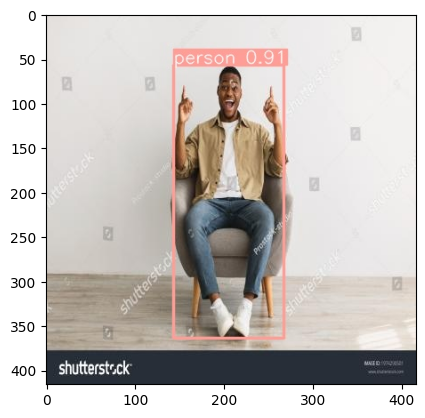

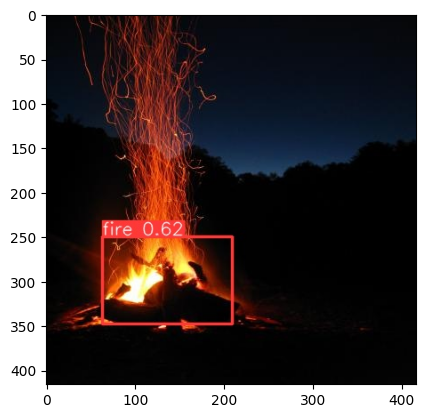

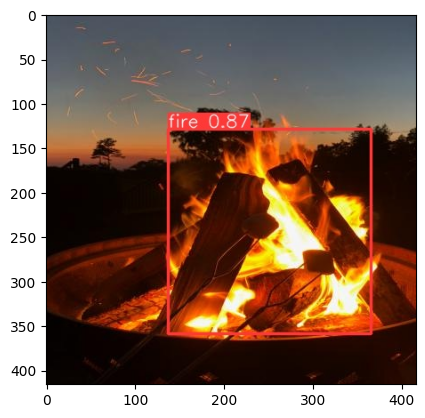

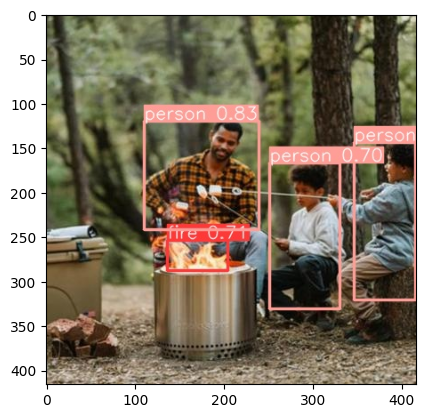

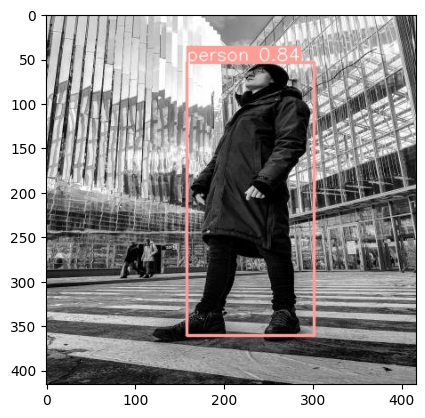

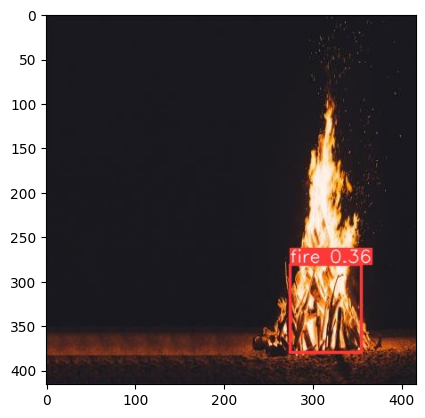

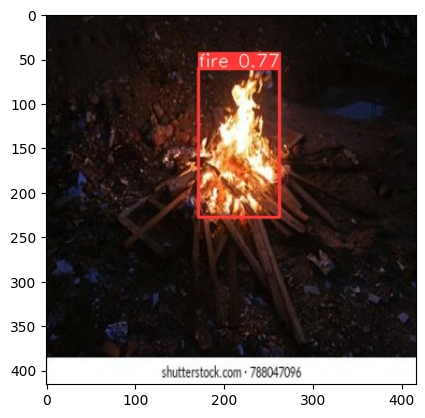

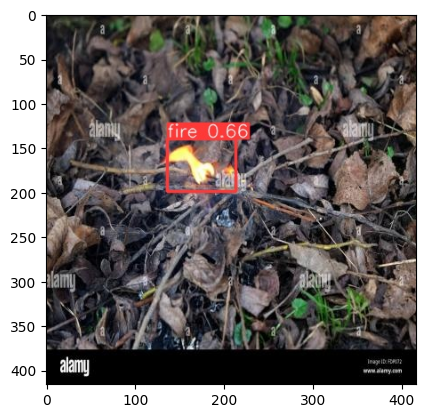

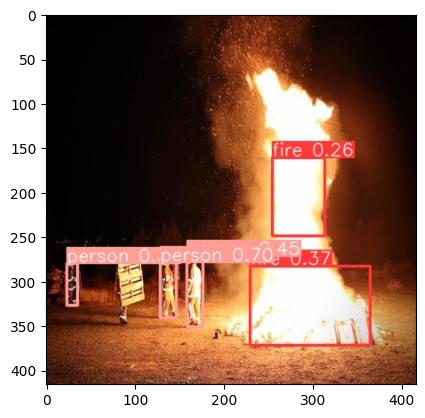

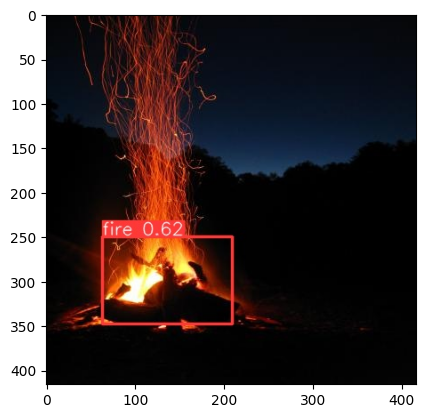

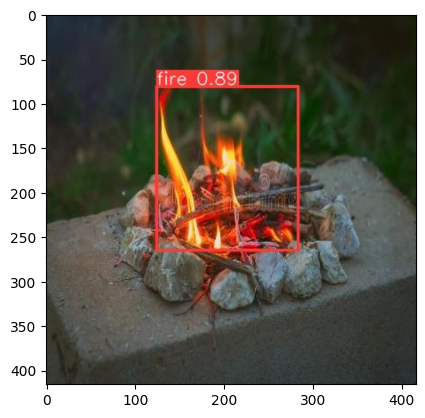

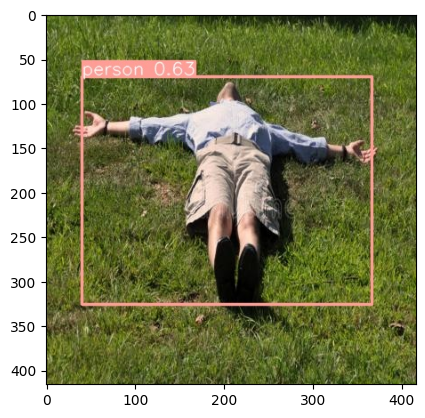

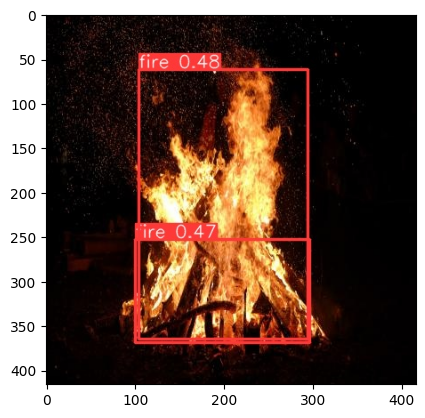

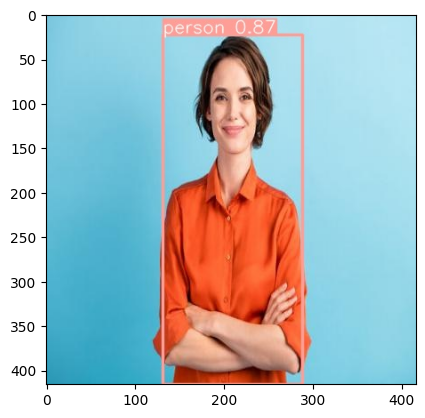

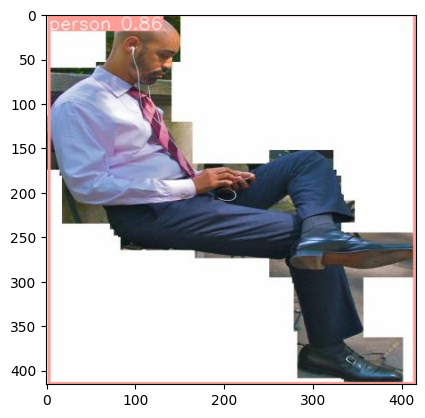

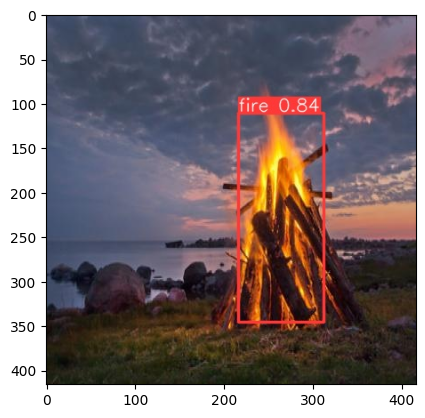

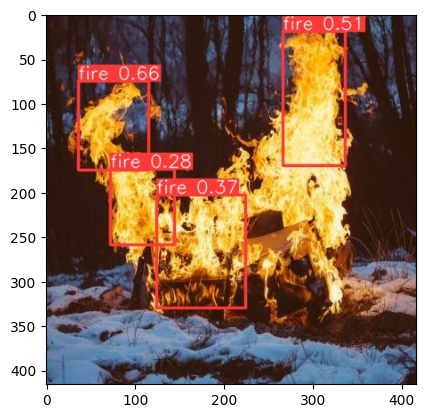

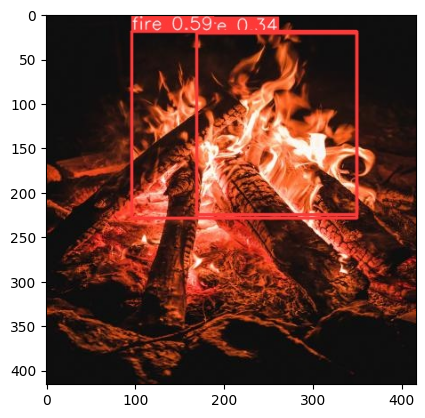

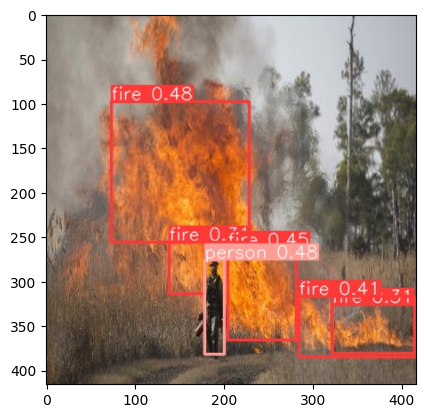

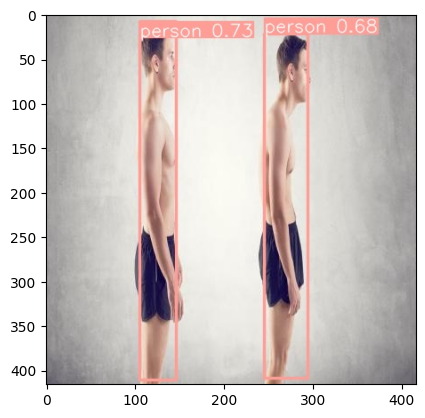

In [13]:
predictions = os.listdir('/kaggle/working/runs/detect/predict')

for pred in predictions:
    img = cv2.imread(f'/kaggle/working/runs/detect/predict/{pred}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()